<a href="https://colab.research.google.com/github/makropolecenia/Book/blob/master/covidtrackerfromapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skrypt pobierający dane z covidtracker z API

In [2]:
import pandas as pd
from datetime import datetime 

Przykładowy rekord, potem trzeba dodać pętlę dla kazdego kraju dla potrzebnych dat (10 do tyłu?)

Potrzebny: słownik kodów krajów + lista dat od dziś wstecz

In [3]:
df = pd.read_json(path_or_buf = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/POL/2021-06-20', orient = 'index')

Tu nalezy sprawdzić czy dane istnieją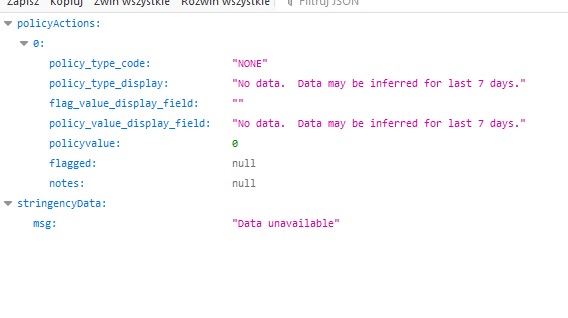

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
policyActions,"{'policy_type_code': 'C1', 'policy_type_displa...","{'policy_type_code': 'C2', 'policy_type_displa...","{'policy_type_code': 'C3', 'policy_type_displa...","{'policy_type_code': 'C4', 'policy_type_displa...","{'policy_type_code': 'C5', 'policy_type_displa...","{'policy_type_code': 'C6', 'policy_type_displa...","{'policy_type_code': 'C7', 'policy_type_displa...","{'policy_type_code': 'C8', 'policy_type_displa...","{'policy_type_code': 'E1', 'policy_type_displa...","{'policy_type_code': 'E2', 'policy_type_displa...","{'policy_type_code': 'E3', 'policy_type_displa...","{'policy_type_code': 'E4', 'policy_type_displa...","{'policy_type_code': 'H1', 'policy_type_displa...","{'policy_type_code': 'H2', 'policy_type_displa...","{'policy_type_code': 'H3', 'policy_type_displa...","{'policy_type_code': 'H4', 'policy_type_displa...","{'policy_type_code': 'H5', 'policy_type_displa...","{'policy_type_code': 'H6', 'policy_type_displa...","{'policy_type_code': 'H7', 'policy_type_displa...","{'policy_type_code': 'H8', 'policy_type_displa..."
stringencyData,date_value,country_code,confirmed,deaths,stringency_actual,stringency,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [5]:
if not (df[0][0]['policy_type_code'] == "NONE"):
  c1 = df[0][0]['policyvalue_actual']
  c2 = df[1][0]['policyvalue_actual']
  c3 = df[2][0]['policyvalue_actual']
  c4 = df[3][0]['policyvalue_actual']
  c5 = df[4][0]['policyvalue_actual']
  c6 = df[5][0]['policyvalue_actual']
  c7 = df[6][0]['policyvalue_actual']
  c8 = df[7][0]['policyvalue_actual']
  e1 = df[8][0]['policyvalue_actual']
  e2 = df[9][0]['policyvalue_actual']
  e3 = df[10][0]['policyvalue_actual']
  e4 = df[11][0]['policyvalue_actual']
  h1 = df[12][0]['policyvalue_actual']
  h2 = df[13][0]['policyvalue_actual']
  h3 = df[14][0]['policyvalue_actual']
  h4 = df[15][0]['policyvalue_actual']
  h5 = df[16][0]['policyvalue_actual']
  h6 = df[17][0]['policyvalue_actual']
  h7 = df[18][0]['policyvalue_actual']
  h8 = df[19][0]['policyvalue_actual']

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
policyActions,"{'policy_type_code': 'C1', 'policy_type_displa...","{'policy_type_code': 'C2', 'policy_type_displa...","{'policy_type_code': 'C3', 'policy_type_displa...","{'policy_type_code': 'C4', 'policy_type_displa...","{'policy_type_code': 'C5', 'policy_type_displa...","{'policy_type_code': 'C6', 'policy_type_displa...","{'policy_type_code': 'C7', 'policy_type_displa...","{'policy_type_code': 'C8', 'policy_type_displa...","{'policy_type_code': 'E1', 'policy_type_displa...","{'policy_type_code': 'E2', 'policy_type_displa...","{'policy_type_code': 'E3', 'policy_type_displa...","{'policy_type_code': 'E4', 'policy_type_displa...","{'policy_type_code': 'H1', 'policy_type_displa...","{'policy_type_code': 'H2', 'policy_type_displa...","{'policy_type_code': 'H3', 'policy_type_displa...","{'policy_type_code': 'H4', 'policy_type_displa...","{'policy_type_code': 'H5', 'policy_type_displa...","{'policy_type_code': 'H6', 'policy_type_displa...","{'policy_type_code': 'H7', 'policy_type_displa...","{'policy_type_code': 'H8', 'policy_type_displa..."
stringencyData,date_value,country_code,confirmed,deaths,stringency_actual,stringency,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Słowniki

In [7]:
policies = {c1, c2, c3, c4, c5, c6, c7, c8, e1, e2, e3, e4, h1, h2, h3, h4, h5, h6, h7}

data = '2021-02-20'

policies_indicators = {'31001000000':c1,
                       '31002000000':c2,
                       '31003000000':c3,
                       '31004000000':c4,
                       '31005000000':c5,
                       '31006000000':c6,
                       '31007000000':c7,
                       '31008000000':c8,
                       '32001000000':e1,
                       '32002000000':e2,
                       '32003000000':e3,
                       '32004000000':e4,
                       '33001000000':h1,
                       '33002000000':h2,
                       '33003000000':h3,
                       '33004000000':h4,
                       '33005000000':h5,
                       '31009000000':h6,
                       '33101000000':h7}

country_codes = {'POL':3,
             'AUT':4,
             'BEL':5,
             'BGR':6,
             'HRV':7,
             'CYP':8,
             'CZE':9,
             'DNK':10,
             'EST':11,
             'FIN':12,
             'FRA':13,
             'GRC':14,
             'ESP':15,
             'NLD':16,
             'IRL':17,
             'LTU':18,
             'LUX':19,
             'LVA':20,
             'MLT':21,
             'DEU':22,
             'PRT':23,
             'ROU':24,
             'SVK':25,
             'SVN':26,
             'SWE':27,
             'HUN':28,
             'GBR':29,
             'ITA':30}
country_list = country_codes.keys()

In [ ]:
df2 = pd.DataFrame.from_dict(policies_indicators, orient='index')

In [ ]:
df2

,0
31001000000,1
31002000000,2
31003000000,1
31004000000,2
31005000000,1
31006000000,1
31007000000,1
31008000000,2
32001000000,2
32002000000,1


In [ ]:
df2.reset_index(inplace=True)


In [ ]:
df2['id_teryt'] = 3
data = '2021-06-20'
df2['data'] = data

In [ ]:
df2=df2.rename(columns = {'index': 'id_wskaznik', 0:'wartosc'} )

Dodajemy stopkę

In [ ]:
df2['data_wprowadzenia'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
df2['data_modyfikacji'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
df2['id_komentarz'] = 1
df2['id_wprowadzajacego'] = 15
df2['id_modyfikujacego'] = 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
df2

,id_wskaznik,wartosc,id_teryt,data,data_wprowadzenia,data_modyfikacji,id_komentarz,id_wprowadzajacego,id_modyfikujacego
0,31001000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
1,31002000000,2,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
2,31003000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
3,31004000000,2,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
4,31005000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
5,31006000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
6,31007000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
7,31008000000,2,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
8,32001000000,2,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
9,32002000000,1,3,2021-06-20,2021-06-29,2021-06-29,1,15,15


SLOWNIKI

In [ ]:
dict3 ={

            #'0':'0',
            #'EU28':'1',
            #'EU27_2020':'2',
        
            'POL':'3',
            'AUT':'4',
            'BEL':'5',
            'BGR':'6',
            'HRV':'7',
            'CYP':'8',
            'CZE':'9',
            'DNK':'10',
            'EST':'11',
            'FIN':'12',
            'FRA':'13',
            'GRC':'14',
            'ESP':'15',
            'NLD':'16',
            'IRL':'17',
            'LTU':'18',
            'LUX':'19',
            'LVA':'20',
            'MLT':'21',
            'DEU':'22',
            'PRT':'23',
            'ROU':'24',
            'SVK':'25',
            'SVN':'26',
            'SWE':'27',
            'HUN':'28',
            'GBR':'29',
            'ITA':'30'}

print (len (dict3))

27


In [ ]:
#dict.items()
#list=dict3.items()
list=dict3.keys()
list

dict_keys(['POL', 'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'ESP', 'NLD', 'IRL', 'LTU', 'LUX', 'LVA', 'DEU', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'HUN', 'GBR', 'ITA'])

In [ ]:
list =[3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 , 30 ]

In [ ]:
kraje = ['POL', 'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'ESP', 'NLD', 'IRL', 'LTU', 'LUX', 'LVA', 'DEU', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'HUN', 'GBR', 'ITA']

In [ ]:
 for j in list :

    print (j )

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
for x in country_codes.keys():

  print(x)

NameError: ignored

PRZYGOTOWANIE PETLI PODSTAWIAJACEJ KOD KRAJU POD URL 

In [ ]:
#petla podstawiajaca pod url kraje 

for x in country_codes.keys():

  print ( "https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/"+str (x)+"/2021-06-20")

  #print(x)



NameError: ignored

SCRAPER API Z WYKORZYSTANIEM JEDNEJ PETLI PODSTAWIAJACEJ KOD KRAJU POD URL,

 OUTPUT : POLACZONE RAMKI DANYCH DO EXCELA

In [ ]:
#jedna petla podstawiajaca pod url kraje z wykonaniem ramki danych

magazyn =[]

for x in country_codes.keys():


  #print ( "https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/"+str (x)+"/2021-06-20")

  #print(x)


  #df = pd.read_json(path_or_buf = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/POL/2021-06-20', orient = 'index')



  print(x)

  df = pd.read_json(path_or_buf = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/'+str(x)+'/2021-06-20', orient = 'index')
  
  
  if not (df[0][0]['policy_type_code'] == "NONE"):
    c1 = df[0][0]['policyvalue_actual']
    c2 = df[1][0]['policyvalue_actual']
    c3 = df[2][0]['policyvalue_actual']
    c4 = df[3][0]['policyvalue_actual']
    c5 = df[4][0]['policyvalue_actual']
    c6 = df[5][0]['policyvalue_actual']
    c7 = df[6][0]['policyvalue_actual']
    c8 = df[7][0]['policyvalue_actual']
    e1 = df[8][0]['policyvalue_actual']
    e2 = df[9][0]['policyvalue_actual']
    e3 = df[10][0]['policyvalue_actual']
    e4 = df[11][0]['policyvalue_actual']
    h1 = df[12][0]['policyvalue_actual']
    h2 = df[13][0]['policyvalue_actual']
    h3 = df[14][0]['policyvalue_actual']
    h4 = df[15][0]['policyvalue_actual']
    #h5 = df[16][0]['policyvalue_actual']
    #h6 = df[17][0]['policyvalue_actual']
    #h7 = df[18][0]['policyvalue_actual']
    #h8 = df[19][0]['policyvalue_actual']

    policies = {c1, c2, c3, c4, c5, c6, c7, c8, e1, e2, e3, e4, h1, h2, h3, h4, h5, h6, h7}

    data = '2021-02-20'

    policies_indicators = {'31001000000':c1,
                       '31002000000':c2,
                       '31003000000':c3,
                       '31004000000':c4,
                       '31005000000':c5,
                       '31006000000':c6,
                       '31007000000':c7,
                       '31008000000':c8,
                       '32001000000':e1,
                       '32002000000':e2,
                       '32003000000':e3,
                       '32004000000':e4,
                       '33001000000':h1,
                       '33002000000':h2,
                       '33003000000':h3,
                       '33004000000':h4,
                       '33005000000':h5,
                       '31009000000':h6,
                       '33101000000':h7}

    country_codes = {'POL':3,
             'AUT':4,
             'BEL':5,
             'BGR':6,
             'HRV':7,
             'CYP':8,
             'CZE':9,
             'DNK':10,
             'EST':11,
             'FIN':12,
             'FRA':13,
             'GRC':14,
             'ESP':15,
             'NLD':16,
             'IRL':17,
             'LTU':18,
             'LUX':19,
             'LVA':20,
             'MLT':21,
             'DEU':22,
             'PRT':23,
             'ROU':24,
             'SVK':25,
             'SVN':26,
             'SWE':27,
             'HUN':28,
             'GBR':29,
             'ITA':30}

    country_list = country_codes.keys()

    df2 = pd.DataFrame.from_dict(policies_indicators, orient='index')
  
    df2.reset_index(inplace=True)
  
    #df2['id_teryt'] = 3
    df2['id_teryt_kod_literowy'] = x
    df2['id_teryt']=df2['id_teryt_kod_literowy'].map (country_codes )


    data = '2021-06-20'
    df2['data'] = data
   
    df2=df2.rename(columns = {'index': 'id_wskaznik', 0:'wartosc'} )
    df2['data_wprowadzenia'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
    df2['data_modyfikacji'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
    df2['id_komentarz'] = 1
    df2['id_wprowadzajacego'] = 15
    df2['id_modyfikujacego'] = 15
  
  print (df2)
 

  magazyn .append (df2 )


print (" zawartosc magazynu ")
print (magazyn )
print (" koniec zawartosci magazynu ")

datex =pd .concat (magazyn )
print (" połączony magazyn ")
print(datex)

df_to_excel =pd .DataFrame (datex )
df_to_excel .to_excel ("API_JEDNA_PETLA_KRAJE.xlsx")
print (" zakonczenie programu ")

datex

POL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        2  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        1  ...                 15                 15
6   31007000000        1  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        2  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        3  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        2  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        1  ...                 15                 15
8   32001000000        1  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        3  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        2  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        1  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        3  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        2  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        0  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        1  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        0  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        2  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        2  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        1  ...                 15                 15
6   31007000000        1  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        3  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        1  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        2  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        1  ...                 15                 15
6   31007000000        1  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        0  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        3  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        3  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        2  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        2  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        0  ...                 15                 15
5   31006000000        2  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        2  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        3  ...                 15                 15
13  33002000000        0  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        0  ...                 15                 15
1   31002000000        1  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        1  ...                 15                 15
6   31007000000        1  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        0  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  wartosc  ... id_wprowadzajacego  id_modyfikujacego
0   31001000000        1  ...                 15                 15
1   31002000000        2  ...                 15                 15
2   31003000000        1  ...                 15                 15
3   31004000000        4  ...                 15                 15
4   31005000000        1  ...                 15                 15
5   31006000000        0  ...                 15                 15
6   31007000000        0  ...                 15                 15
7   31008000000        3  ...                 15                 15
8   32001000000        2  ...                 15                 15
9   32002000000        2  ...                 15                 15
10  32003000000        0  ...                 15                 15
11  32004000000        0  ...                 15                 15
12  33001000000        2  ...                 15                 15
13  33002000000        2  ...                 15

,id_wskaznik,wartosc,id_teryt_kod_literowy,id_teryt,data,data_wprowadzenia,data_modyfikacji,id_komentarz,id_wprowadzajacego,id_modyfikujacego
0,31001000000,1,POL,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
1,31002000000,2,POL,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
2,31003000000,1,POL,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
3,31004000000,2,POL,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
4,31005000000,1,POL,3,2021-06-20,2021-06-29,2021-06-29,1,15,15
...,...,...,...,...,...,...,...,...,...,...
14,33003000000,2,ITA,30,2021-06-20,2021-06-29,2021-06-29,1,15,15
15,33004000000,0,ITA,30,2021-06-20,2021-06-29,2021-06-29,1,15,15
16,33005000000,0,ITA,30,2021-06-20,2021-06-29,2021-06-29,1,15,15
17,31009000000,3,ITA,30,2021-06-20,2021-06-29,2021-06-29,1,15,15


połączone petle wewnetrzna kraje zmienna sterujaca x, zewnetrzna daty zmienna sterujaca i 

In [8]:
#połączone petle wewnetrzna kraje zmienna sterujaca x, zewnetrzna daty zmienna sterujaca i 

#zakres dat 10 dni wstecz ale można zmienić na dowolny zakres



from datetime import date, timedelta
magazyn =[]
magazyn1 = []
magazyn2 = []
magazynek = []


todaysdate = date.today() + timedelta(days=0)
todaysdate.strftime("%Y-%m-%d")
print("todaysdate") 
print(todaysdate) 
print(type(todaysdate))

ten_days_ago = date.today() + timedelta(days=-10)
ten_days_ago.strftime("%Y-%m-%d")
print("ten_days_ago")
print(ten_days_ago) 
print(type(ten_days_ago))

start_date = ten_days_ago
#end_date = todaysdate # niepoprawnie sformatowana odpowiedź api dla 28 i 29 czerwca 
end_date = date(2021, 6, 27) # sztucznie podstawiona data koncowa, ostatnia poprawna 27 czerwca


#start_date = date(2021, 1, 1)
#end_date = date(2021, 2, 1)

delta = timedelta(days=1)
while start_date <= end_date:
    magazyn1 .append (start_date.strftime("%Y-%m-%d"))
    start_date += delta


print (" zawartosc magazynu1 - lista dat ")
print (magazyn1 )
print (" koniec zawartosci magazynu1 ")


for i in magazyn1 :

  for x in country_codes.keys():

    print("aktualne wartosci zmiennych  w petli")
    print("...")
    print("daty - petla zewnetrzna")
    print(i)  #daty - petla zewnetrzna
    print("kraj - petla wewnetrzna")
    print(x) #kraj - petla wewnetrzna
    

    
    
    print('https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/'+str(x)+'/'+str (i))

    df = pd.read_json(path_or_buf = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/'+str(x)+'/'+str (i), orient = 'index')
    
      
    if not (df[0][0]['policy_type_code'] == "NONE"):
      c1 = df[0][0]['policyvalue_actual']
      c2 = df[1][0]['policyvalue_actual']
      c3 = df[2][0]['policyvalue_actual']
      c4 = df[3][0]['policyvalue_actual']
      c5 = df[4][0]['policyvalue_actual']
      c6 = df[5][0]['policyvalue_actual']
      c7 = df[6][0]['policyvalue_actual']
      c8 = df[7][0]['policyvalue_actual']
      e1 = df[8][0]['policyvalue_actual']
      e2 = df[9][0]['policyvalue_actual']
      e3 = df[10][0]['policyvalue_actual']
      e4 = df[11][0]['policyvalue_actual']
      h1 = df[12][0]['policyvalue_actual']
      h2 = df[13][0]['policyvalue_actual']
      h3 = df[14][0]['policyvalue_actual']
      h4 = df[15][0]['policyvalue_actual']
      #h5 = df[16][0]['policyvalue_actual']
      #h6 = df[17][0]['policyvalue_actual']
      #h7 = df[18][0]['policyvalue_actual']
      #h8 = df[19][0]['policyvalue_actual']

      policies = {c1, c2, c3, c4, c5, c6, c7, c8, e1, e2, e3, e4, h1, h2, h3, h4, h5, h6, h7}

      data = '2021-02-20'

      policies_indicators = {'31001000000':c1,
                        '31002000000':c2,
                        '31003000000':c3,
                        '31004000000':c4,
                        '31005000000':c5,
                        '31006000000':c6,
                        '31007000000':c7,
                        '31008000000':c8,
                        '32001000000':e1,
                        '32002000000':e2,
                        '32003000000':e3,
                        '32004000000':e4,
                        '33001000000':h1,
                        '33002000000':h2,
                        '33003000000':h3,
                        '33004000000':h4,
                        '33005000000':h5,
                        '31009000000':h6,
                        '33101000000':h7}

      country_codes = {'POL':3,
              'AUT':4,
              'BEL':5,
              'BGR':6,
              'HRV':7,
              'CYP':8,
              'CZE':9,
              'DNK':10,
              'EST':11,
              'FIN':12,
              'FRA':13,
              'GRC':14,
              'ESP':15,
              'NLD':16,
              'IRL':17,
              'LTU':18,
              'LUX':19,
              'LVA':20,
              'MLT':21,
              'DEU':22,
              'PRT':23,
              'ROU':24,
              'SVK':25,
              'SVN':26,
              'SWE':27,
              'HUN':28,
              'GBR':29,
              'ITA':30}

      country_list = country_codes.keys()

      df2 = pd.DataFrame.from_dict(policies_indicators, orient='index')
    
      df2.reset_index(inplace=True)
    
      
      df2['id_teryt_kod_literowy'] = x
      df2['id_teryt']=df2['id_teryt_kod_literowy'].map (country_codes )


      
      data = i

      df2['data'] = data
    
      df2=df2.rename(columns = {'index': 'id_wskaznik', 0:'wartosc'} )
      df2['data_wprowadzenia'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
      df2['data_modyfikacji'] = pd.datetime.now().replace(hour=0,minute=0,second=0,microsecond=0)
      df2['id_komentarz'] = 1
      df2['id_wprowadzajacego'] = 15
      df2['id_modyfikujacego'] = 15

      df2['kontrolnie_data_z_petli_zewnetrznej'] = i
      df2['kontrolnie_kod_kraju_z_petli_wewnetrznej'] = x
    
      print (df2)
  
      magazyn .append (df2 )


print (" zawartosc magazynu ")
print (magazyn )
print (" koniec zawartosci magazynu ")

datex =pd .concat (magazyn )
print (" połączony magazyn ")
print(datex)

df_to_excel =pd .DataFrame (datex )
df_to_excel .to_excel ("API_DWIE_PETLE_KRAJE_WEW_DATY_ZEW.xlsx")
print (" zakonczenie programu ")

datex

todaysdate
2021-06-30
<class 'datetime.date'>
ten_days_ago
2021-06-20
<class 'datetime.date'>
 zawartosc magazynu1 - lista dat 
['2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27']
 koniec zawartosci magazynu1 
aktualne wartosci zmiennych  w petli
...
daty - petla zewnetrzna
2021-06-20
kraj - petla wewnetrzna
POL
https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/POL/2021-06-20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BGR
1   31002000000  ...                                       BGR
2   31003000000  ...                                       BGR
3   31004000000  ...                                       BGR
4   31005000000  ...                                       BGR
5   31006000000  ...                                       BGR
6   31007000000  ...                                       BGR
7   31008000000  ...                                       BGR
8   32001000000  ...                                       BGR
9   32002000000  ...                                       BGR
10  32003000000  ...                                       BGR
11  32004000000  ...                                       BGR
12  33001000000  ...                                       BGR
13  33002000000  ...                                       BGR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HRV
1   31002000000  ...                                       HRV
2   31003000000  ...                                       HRV
3   31004000000  ...                                       HRV
4   31005000000  ...                                       HRV
5   31006000000  ...                                       HRV
6   31007000000  ...                                       HRV
7   31008000000  ...                                       HRV
8   32001000000  ...                                       HRV
9   32002000000  ...                                       HRV
10  32003000000  ...                                       HRV
11  32004000000  ...                                       HRV
12  33001000000  ...                                       HRV
13  33002000000  ...                                       HRV
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CYP
1   31002000000  ...                                       CYP
2   31003000000  ...                                       CYP
3   31004000000  ...                                       CYP
4   31005000000  ...                                       CYP
5   31006000000  ...                                       CYP
6   31007000000  ...                                       CYP
7   31008000000  ...                                       CYP
8   32001000000  ...                                       CYP
9   32002000000  ...                                       CYP
10  32003000000  ...                                       CYP
11  32004000000  ...                                       CYP
12  33001000000  ...                                       CYP
13  33002000000  ...                                       CYP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GRC
1   31002000000  ...                                       GRC
2   31003000000  ...                                       GRC
3   31004000000  ...                                       GRC
4   31005000000  ...                                       GRC
5   31006000000  ...                                       GRC
6   31007000000  ...                                       GRC
7   31008000000  ...                                       GRC
8   32001000000  ...                                       GRC
9   32002000000  ...                                       GRC
10  32003000000  ...                                       GRC
11  32004000000  ...                                       GRC
12  33001000000  ...                                       GRC
13  33002000000  ...                                       GRC
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       NLD
1   31002000000  ...                                       NLD
2   31003000000  ...                                       NLD
3   31004000000  ...                                       NLD
4   31005000000  ...                                       NLD
5   31006000000  ...                                       NLD
6   31007000000  ...                                       NLD
7   31008000000  ...                                       NLD
8   32001000000  ...                                       NLD
9   32002000000  ...                                       NLD
10  32003000000  ...                                       NLD
11  32004000000  ...                                       NLD
12  33001000000  ...                                       NLD
13  33002000000  ...                                       NLD
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LTU
1   31002000000  ...                                       LTU
2   31003000000  ...                                       LTU
3   31004000000  ...                                       LTU
4   31005000000  ...                                       LTU
5   31006000000  ...                                       LTU
6   31007000000  ...                                       LTU
7   31008000000  ...                                       LTU
8   32001000000  ...                                       LTU
9   32002000000  ...                                       LTU
10  32003000000  ...                                       LTU
11  32004000000  ...                                       LTU
12  33001000000  ...                                       LTU
13  33002000000  ...                                       LTU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ROU
1   31002000000  ...                                       ROU
2   31003000000  ...                                       ROU
3   31004000000  ...                                       ROU
4   31005000000  ...                                       ROU
5   31006000000  ...                                       ROU
6   31007000000  ...                                       ROU
7   31008000000  ...                                       ROU
8   32001000000  ...                                       ROU
9   32002000000  ...                                       ROU
10  32003000000  ...                                       ROU
11  32004000000  ...                                       ROU
12  33001000000  ...                                       ROU
13  33002000000  ...                                       ROU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVN
1   31002000000  ...                                       SVN
2   31003000000  ...                                       SVN
3   31004000000  ...                                       SVN
4   31005000000  ...                                       SVN
5   31006000000  ...                                       SVN
6   31007000000  ...                                       SVN
7   31008000000  ...                                       SVN
8   32001000000  ...                                       SVN
9   32002000000  ...                                       SVN
10  32003000000  ...                                       SVN
11  32004000000  ...                                       SVN
12  33001000000  ...                                       SVN
13  33002000000  ...                                       SVN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BGR
1   31002000000  ...                                       BGR
2   31003000000  ...                                       BGR
3   31004000000  ...                                       BGR
4   31005000000  ...                                       BGR
5   31006000000  ...                                       BGR
6   31007000000  ...                                       BGR
7   31008000000  ...                                       BGR
8   32001000000  ...                                       BGR
9   32002000000  ...                                       BGR
10  32003000000  ...                                       BGR
11  32004000000  ...                                       BGR
12  33001000000  ...                                       BGR
13  33002000000  ...                                       BGR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HRV
1   31002000000  ...                                       HRV
2   31003000000  ...                                       HRV
3   31004000000  ...                                       HRV
4   31005000000  ...                                       HRV
5   31006000000  ...                                       HRV
6   31007000000  ...                                       HRV
7   31008000000  ...                                       HRV
8   32001000000  ...                                       HRV
9   32002000000  ...                                       HRV
10  32003000000  ...                                       HRV
11  32004000000  ...                                       HRV
12  33001000000  ...                                       HRV
13  33002000000  ...                                       HRV
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CYP
1   31002000000  ...                                       CYP
2   31003000000  ...                                       CYP
3   31004000000  ...                                       CYP
4   31005000000  ...                                       CYP
5   31006000000  ...                                       CYP
6   31007000000  ...                                       CYP
7   31008000000  ...                                       CYP
8   32001000000  ...                                       CYP
9   32002000000  ...                                       CYP
10  32003000000  ...                                       CYP
11  32004000000  ...                                       CYP
12  33001000000  ...                                       CYP
13  33002000000  ...                                       CYP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GRC
1   31002000000  ...                                       GRC
2   31003000000  ...                                       GRC
3   31004000000  ...                                       GRC
4   31005000000  ...                                       GRC
5   31006000000  ...                                       GRC
6   31007000000  ...                                       GRC
7   31008000000  ...                                       GRC
8   32001000000  ...                                       GRC
9   32002000000  ...                                       GRC
10  32003000000  ...                                       GRC
11  32004000000  ...                                       GRC
12  33001000000  ...                                       GRC
13  33002000000  ...                                       GRC
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       NLD
1   31002000000  ...                                       NLD
2   31003000000  ...                                       NLD
3   31004000000  ...                                       NLD
4   31005000000  ...                                       NLD
5   31006000000  ...                                       NLD
6   31007000000  ...                                       NLD
7   31008000000  ...                                       NLD
8   32001000000  ...                                       NLD
9   32002000000  ...                                       NLD
10  32003000000  ...                                       NLD
11  32004000000  ...                                       NLD
12  33001000000  ...                                       NLD
13  33002000000  ...                                       NLD
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ROU
1   31002000000  ...                                       ROU
2   31003000000  ...                                       ROU
3   31004000000  ...                                       ROU
4   31005000000  ...                                       ROU
5   31006000000  ...                                       ROU
6   31007000000  ...                                       ROU
7   31008000000  ...                                       ROU
8   32001000000  ...                                       ROU
9   32002000000  ...                                       ROU
10  32003000000  ...                                       ROU
11  32004000000  ...                                       ROU
12  33001000000  ...                                       ROU
13  33002000000  ...                                       ROU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BGR
1   31002000000  ...                                       BGR
2   31003000000  ...                                       BGR
3   31004000000  ...                                       BGR
4   31005000000  ...                                       BGR
5   31006000000  ...                                       BGR
6   31007000000  ...                                       BGR
7   31008000000  ...                                       BGR
8   32001000000  ...                                       BGR
9   32002000000  ...                                       BGR
10  32003000000  ...                                       BGR
11  32004000000  ...                                       BGR
12  33001000000  ...                                       BGR
13  33002000000  ...                                       BGR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HRV
1   31002000000  ...                                       HRV
2   31003000000  ...                                       HRV
3   31004000000  ...                                       HRV
4   31005000000  ...                                       HRV
5   31006000000  ...                                       HRV
6   31007000000  ...                                       HRV
7   31008000000  ...                                       HRV
8   32001000000  ...                                       HRV
9   32002000000  ...                                       HRV
10  32003000000  ...                                       HRV
11  32004000000  ...                                       HRV
12  33001000000  ...                                       HRV
13  33002000000  ...                                       HRV
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       NLD
1   31002000000  ...                                       NLD
2   31003000000  ...                                       NLD
3   31004000000  ...                                       NLD
4   31005000000  ...                                       NLD
5   31006000000  ...                                       NLD
6   31007000000  ...                                       NLD
7   31008000000  ...                                       NLD
8   32001000000  ...                                       NLD
9   32002000000  ...                                       NLD
10  32003000000  ...                                       NLD
11  32004000000  ...                                       NLD
12  33001000000  ...                                       NLD
13  33002000000  ...                                       NLD
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HRV
1   31002000000  ...                                       HRV
2   31003000000  ...                                       HRV
3   31004000000  ...                                       HRV
4   31005000000  ...                                       HRV
5   31006000000  ...                                       HRV
6   31007000000  ...                                       HRV
7   31008000000  ...                                       HRV
8   32001000000  ...                                       HRV
9   32002000000  ...                                       HRV
10  32003000000  ...                                       HRV
11  32004000000  ...                                       HRV
12  33001000000  ...                                       HRV
13  33002000000  ...                                       HRV
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       NLD
1   31002000000  ...                                       NLD
2   31003000000  ...                                       NLD
3   31004000000  ...                                       NLD
4   31005000000  ...                                       NLD
5   31006000000  ...                                       NLD
6   31007000000  ...                                       NLD
7   31008000000  ...                                       NLD
8   32001000000  ...                                       NLD
9   32002000000  ...                                       NLD
10  32003000000  ...                                       NLD
11  32004000000  ...                                       NLD
12  33001000000  ...                                       NLD
13  33002000000  ...                                       NLD
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HRV
1   31002000000  ...                                       HRV
2   31003000000  ...                                       HRV
3   31004000000  ...                                       HRV
4   31005000000  ...                                       HRV
5   31006000000  ...                                       HRV
6   31007000000  ...                                       HRV
7   31008000000  ...                                       HRV
8   32001000000  ...                                       HRV
9   32002000000  ...                                       HRV
10  32003000000  ...                                       HRV
11  32004000000  ...                                       HRV
12  33001000000  ...                                       HRV
13  33002000000  ...                                       HRV
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       NLD
1   31002000000  ...                                       NLD
2   31003000000  ...                                       NLD
3   31004000000  ...                                       NLD
4   31005000000  ...                                       NLD
5   31006000000  ...                                       NLD
6   31007000000  ...                                       NLD
7   31008000000  ...                                       NLD
8   32001000000  ...                                       NLD
9   32002000000  ...                                       NLD
10  32003000000  ...                                       NLD
11  32004000000  ...                                       NLD
12  33001000000  ...                                       NLD
13  33002000000  ...                                       NLD
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       POL
1   31002000000  ...                                       POL
2   31003000000  ...                                       POL
3   31004000000  ...                                       POL
4   31005000000  ...                                       POL
5   31006000000  ...                                       POL
6   31007000000  ...                                       POL
7   31008000000  ...                                       POL
8   32001000000  ...                                       POL
9   32002000000  ...                                       POL
10  32003000000  ...                                       POL
11  32004000000  ...                                       POL
12  33001000000  ...                                       POL
13  33002000000  ...                                       POL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FRA
1   31002000000  ...                                       FRA
2   31003000000  ...                                       FRA
3   31004000000  ...                                       FRA
4   31005000000  ...                                       FRA
5   31006000000  ...                                       FRA
6   31007000000  ...                                       FRA
7   31008000000  ...                                       FRA
8   32001000000  ...                                       FRA
9   32002000000  ...                                       FRA
10  32003000000  ...                                       FRA
11  32004000000  ...                                       FRA
12  33001000000  ...                                       FRA
13  33002000000  ...                                       FRA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       PRT
1   31002000000  ...                                       PRT
2   31003000000  ...                                       PRT
3   31004000000  ...                                       PRT
4   31005000000  ...                                       PRT
5   31006000000  ...                                       PRT
6   31007000000  ...                                       PRT
7   31008000000  ...                                       PRT
8   32001000000  ...                                       PRT
9   32002000000  ...                                       PRT
10  32003000000  ...                                       PRT
11  32004000000  ...                                       PRT
12  33001000000  ...                                       PRT
13  33002000000  ...                                       PRT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       GBR
1   31002000000  ...                                       GBR
2   31003000000  ...                                       GBR
3   31004000000  ...                                       GBR
4   31005000000  ...                                       GBR
5   31006000000  ...                                       GBR
6   31007000000  ...                                       GBR
7   31008000000  ...                                       GBR
8   32001000000  ...                                       GBR
9   32002000000  ...                                       GBR
10  32003000000  ...                                       GBR
11  32004000000  ...                                       GBR
12  33001000000  ...                                       GBR
13  33002000000  ...                                       GBR
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ITA
1   31002000000  ...                                       ITA
2   31003000000  ...                                       ITA
3   31004000000  ...                                       ITA
4   31005000000  ...                                       ITA
5   31006000000  ...                                       ITA
6   31007000000  ...                                       ITA
7   31008000000  ...                                       ITA
8   32001000000  ...                                       ITA
9   32002000000  ...                                       ITA
10  32003000000  ...                                       ITA
11  32004000000  ...                                       ITA
12  33001000000  ...                                       ITA
13  33002000000  ...                                       ITA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       AUT
1   31002000000  ...                                       AUT
2   31003000000  ...                                       AUT
3   31004000000  ...                                       AUT
4   31005000000  ...                                       AUT
5   31006000000  ...                                       AUT
6   31007000000  ...                                       AUT
7   31008000000  ...                                       AUT
8   32001000000  ...                                       AUT
9   32002000000  ...                                       AUT
10  32003000000  ...                                       AUT
11  32004000000  ...                                       AUT
12  33001000000  ...                                       AUT
13  33002000000  ...                                       AUT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       BEL
1   31002000000  ...                                       BEL
2   31003000000  ...                                       BEL
3   31004000000  ...                                       BEL
4   31005000000  ...                                       BEL
5   31006000000  ...                                       BEL
6   31007000000  ...                                       BEL
7   31008000000  ...                                       BEL
8   32001000000  ...                                       BEL
9   32002000000  ...                                       BEL
10  32003000000  ...                                       BEL
11  32004000000  ...                                       BEL
12  33001000000  ...                                       BEL
13  33002000000  ...                                       BEL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       CZE
1   31002000000  ...                                       CZE
2   31003000000  ...                                       CZE
3   31004000000  ...                                       CZE
4   31005000000  ...                                       CZE
5   31006000000  ...                                       CZE
6   31007000000  ...                                       CZE
7   31008000000  ...                                       CZE
8   32001000000  ...                                       CZE
9   32002000000  ...                                       CZE
10  32003000000  ...                                       CZE
11  32004000000  ...                                       CZE
12  33001000000  ...                                       CZE
13  33002000000  ...                                       CZE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DNK
1   31002000000  ...                                       DNK
2   31003000000  ...                                       DNK
3   31004000000  ...                                       DNK
4   31005000000  ...                                       DNK
5   31006000000  ...                                       DNK
6   31007000000  ...                                       DNK
7   31008000000  ...                                       DNK
8   32001000000  ...                                       DNK
9   32002000000  ...                                       DNK
10  32003000000  ...                                       DNK
11  32004000000  ...                                       DNK
12  33001000000  ...                                       DNK
13  33002000000  ...                                       DNK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       EST
1   31002000000  ...                                       EST
2   31003000000  ...                                       EST
3   31004000000  ...                                       EST
4   31005000000  ...                                       EST
5   31006000000  ...                                       EST
6   31007000000  ...                                       EST
7   31008000000  ...                                       EST
8   32001000000  ...                                       EST
9   32002000000  ...                                       EST
10  32003000000  ...                                       EST
11  32004000000  ...                                       EST
12  33001000000  ...                                       EST
13  33002000000  ...                                       EST
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       FIN
1   31002000000  ...                                       FIN
2   31003000000  ...                                       FIN
3   31004000000  ...                                       FIN
4   31005000000  ...                                       FIN
5   31006000000  ...                                       FIN
6   31007000000  ...                                       FIN
7   31008000000  ...                                       FIN
8   32001000000  ...                                       FIN
9   32002000000  ...                                       FIN
10  32003000000  ...                                       FIN
11  32004000000  ...                                       FIN
12  33001000000  ...                                       FIN
13  33002000000  ...                                       FIN
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       ESP
1   31002000000  ...                                       ESP
2   31003000000  ...                                       ESP
3   31004000000  ...                                       ESP
4   31005000000  ...                                       ESP
5   31006000000  ...                                       ESP
6   31007000000  ...                                       ESP
7   31008000000  ...                                       ESP
8   32001000000  ...                                       ESP
9   32002000000  ...                                       ESP
10  32003000000  ...                                       ESP
11  32004000000  ...                                       ESP
12  33001000000  ...                                       ESP
13  33002000000  ...                                       ESP
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       IRL
1   31002000000  ...                                       IRL
2   31003000000  ...                                       IRL
3   31004000000  ...                                       IRL
4   31005000000  ...                                       IRL
5   31006000000  ...                                       IRL
6   31007000000  ...                                       IRL
7   31008000000  ...                                       IRL
8   32001000000  ...                                       IRL
9   32002000000  ...                                       IRL
10  32003000000  ...                                       IRL
11  32004000000  ...                                       IRL
12  33001000000  ...                                       IRL
13  33002000000  ...                                       IRL
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LUX
1   31002000000  ...                                       LUX
2   31003000000  ...                                       LUX
3   31004000000  ...                                       LUX
4   31005000000  ...                                       LUX
5   31006000000  ...                                       LUX
6   31007000000  ...                                       LUX
7   31008000000  ...                                       LUX
8   32001000000  ...                                       LUX
9   32002000000  ...                                       LUX
10  32003000000  ...                                       LUX
11  32004000000  ...                                       LUX
12  33001000000  ...                                       LUX
13  33002000000  ...                                       LUX
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       LVA
1   31002000000  ...                                       LVA
2   31003000000  ...                                       LVA
3   31004000000  ...                                       LVA
4   31005000000  ...                                       LVA
5   31006000000  ...                                       LVA
6   31007000000  ...                                       LVA
7   31008000000  ...                                       LVA
8   32001000000  ...                                       LVA
9   32002000000  ...                                       LVA
10  32003000000  ...                                       LVA
11  32004000000  ...                                       LVA
12  33001000000  ...                                       LVA
13  33002000000  ...                                       LVA
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       MLT
1   31002000000  ...                                       MLT
2   31003000000  ...                                       MLT
3   31004000000  ...                                       MLT
4   31005000000  ...                                       MLT
5   31006000000  ...                                       MLT
6   31007000000  ...                                       MLT
7   31008000000  ...                                       MLT
8   32001000000  ...                                       MLT
9   32002000000  ...                                       MLT
10  32003000000  ...                                       MLT
11  32004000000  ...                                       MLT
12  33001000000  ...                                       MLT
13  33002000000  ...                                       MLT
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       DEU
1   31002000000  ...                                       DEU
2   31003000000  ...                                       DEU
3   31004000000  ...                                       DEU
4   31005000000  ...                                       DEU
5   31006000000  ...                                       DEU
6   31007000000  ...                                       DEU
7   31008000000  ...                                       DEU
8   32001000000  ...                                       DEU
9   32002000000  ...                                       DEU
10  32003000000  ...                                       DEU
11  32004000000  ...                                       DEU
12  33001000000  ...                                       DEU
13  33002000000  ...                                       DEU
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SVK
1   31002000000  ...                                       SVK
2   31003000000  ...                                       SVK
3   31004000000  ...                                       SVK
4   31005000000  ...                                       SVK
5   31006000000  ...                                       SVK
6   31007000000  ...                                       SVK
7   31008000000  ...                                       SVK
8   32001000000  ...                                       SVK
9   32002000000  ...                                       SVK
10  32003000000  ...                                       SVK
11  32004000000  ...                                       SVK
12  33001000000  ...                                       SVK
13  33002000000  ...                                       SVK
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       SWE
1   31002000000  ...                                       SWE
2   31003000000  ...                                       SWE
3   31004000000  ...                                       SWE
4   31005000000  ...                                       SWE
5   31006000000  ...                                       SWE
6   31007000000  ...                                       SWE
7   31008000000  ...                                       SWE
8   32001000000  ...                                       SWE
9   32002000000  ...                                       SWE
10  32003000000  ...                                       SWE
11  32004000000  ...                                       SWE
12  33001000000  ...                                       SWE
13  33002000000  ...                                       SWE
14  33003000000  ...                                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:156: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


    id_wskaznik  ...  kontrolnie_kod_kraju_z_petli_wewnetrznej
0   31001000000  ...                                       HUN
1   31002000000  ...                                       HUN
2   31003000000  ...                                       HUN
3   31004000000  ...                                       HUN
4   31005000000  ...                                       HUN
5   31006000000  ...                                       HUN
6   31007000000  ...                                       HUN
7   31008000000  ...                                       HUN
8   32001000000  ...                                       HUN
9   32002000000  ...                                       HUN
10  32003000000  ...                                       HUN
11  32004000000  ...                                       HUN
12  33001000000  ...                                       HUN
13  33002000000  ...                                       HUN
14  33003000000  ...                                   

,id_wskaznik,wartosc,id_teryt_kod_literowy,id_teryt,data,data_wprowadzenia,data_modyfikacji,id_komentarz,id_wprowadzajacego,id_modyfikujacego,kontrolnie_data_z_petli_zewnetrznej,kontrolnie_kod_kraju_z_petli_wewnetrznej
0,31001000000,1,POL,3,2021-06-20,2021-06-30,2021-06-30,1,15,15,2021-06-20,POL
1,31002000000,2,POL,3,2021-06-20,2021-06-30,2021-06-30,1,15,15,2021-06-20,POL
2,31003000000,1,POL,3,2021-06-20,2021-06-30,2021-06-30,1,15,15,2021-06-20,POL
3,31004000000,2,POL,3,2021-06-20,2021-06-30,2021-06-30,1,15,15,2021-06-20,POL
4,31005000000,1,POL,3,2021-06-20,2021-06-30,2021-06-30,1,15,15,2021-06-20,POL
...,...,...,...,...,...,...,...,...,...,...,...,...
14,33003000000,1,HUN,28,2021-06-27,2021-06-30,2021-06-30,1,15,15,2021-06-27,HUN
15,33004000000,0,HUN,28,2021-06-27,2021-06-30,2021-06-30,1,15,15,2021-06-27,HUN
16,33005000000,0,HUN,28,2021-06-27,2021-06-30,2021-06-30,1,15,15,2021-06-27,HUN
17,31009000000,2,HUN,28,2021-06-27,2021-06-30,2021-06-30,1,15,15,2021-06-27,HUN



KONIEC :)
---

